# NL2NL Results Detailed Report

This notebook provides a comprehensive analysis of the evaluation results from the NL2NL system.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
RESULTS_PATH = "result/results.csv"
if not os.path.exists(RESULTS_PATH):
    raise FileNotFoundError(f"Results file not found: {RESULTS_PATH}")
df = pd.read_csv(RESULTS_PATH)
df.head()

,db_id,original_nl,paraphrased_nl,gt_nl,generated_sql,matched,attempts
0,concert_singer,How many singers do we have?,What is the total number of singers in the sin...,SELECT count(*) FROM singer,SELECT count(*) FROM singer,True,1.0
1,concert_singer,What is the total number of singers?,What is the total count of singers?,SELECT count(*) FROM singer,SELECT count(*) FROM singer,True,1.0
2,concert_singer,"Show name, country, age for all singers ordere...","What are the singer's name, country, and age, ...","SELECT name , country , age FROM singer ORDE...","SELECT name , country , age FROM singer ORDER ...",True,1.0
3,concert_singer,"What are the names, countries, and ages for ev...","What are the singer's name, country, and age f...","SELECT name , country , age FROM singer ORDE...","SELECT name , country , age FROM singer ORDER ...",True,1.0
4,concert_singer,"What is the average, minimum, and maximum age ...","What are the mean, lowest, and highest ages of...","SELECT avg(age) , min(age) , max(age) FROM s...","SELECT avg(age) as mean_age, min(age) as lowes...",True,1.0


## Summary Statistics

In [9]:
# Compute and display summary statistics
total = len(df)
correct = df["matched"].sum() if "matched" in df.columns else 0
accuracy = (correct / total * 100) if total > 0 else 0.0
print(f"Total Samples Evaluated: {total}")
print(f"Correct SQL Matches:     {correct}")
print(f"Accuracy:                {accuracy:.2f}%")

Total Samples Evaluated: 1034
Correct SQL Matches:     788
Accuracy:                76.21%


## Accuracy Visualization

The following plot visualizes the distribution of correct and incorrect SQL matches in the dataset.

/tmp/ipykernel_602176/896086854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="matched", data=df, palette="Set2")


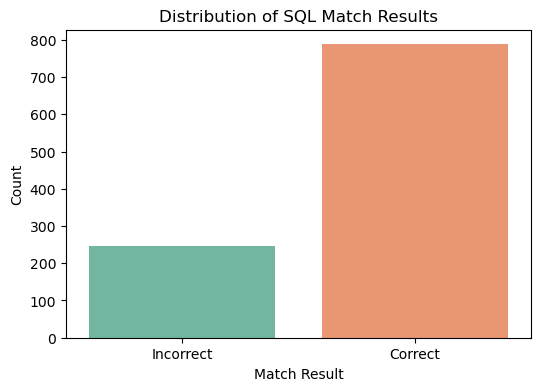

In [10]:
# Plot the distribution of correct and incorrect SQL matches
if "matched" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="matched", data=df, palette="Set2")
    plt.xticks([0,1], ["Incorrect", "Correct"]);
    plt.title("Distribution of SQL Match Results")
    plt.xlabel("Match Result")
    plt.ylabel("Count")
    plt.show()
else:
    print("No 'matched' column in results.")

## Attempts Analysis

This section analyzes the number of attempts taken to achieve a correct SQL match, including average, minimum, and maximum attempts, and visualizes the distribution.

/tmp/ipykernel_602176/1490870792.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attempt_counts.index, y=attempt_counts.values, palette="Blues_d")


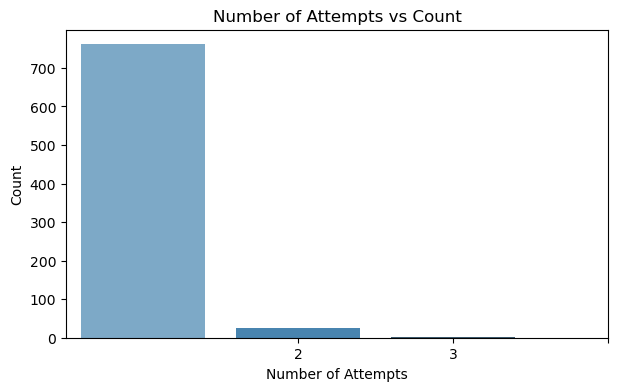

In [11]:
# Bar chart: Number of Attempts vs Count
if "attempts" in df.columns:
    attempts_valid = df["attempts"].replace(-1, pd.NA).dropna().astype(int)
    if not attempts_valid.empty:
        attempt_counts = attempts_valid.value_counts().sort_index()
        plt.figure(figsize=(7,4))
        sns.barplot(x=attempt_counts.index, y=attempt_counts.values, palette="Blues_d")
        plt.title("Number of Attempts vs Count")
        plt.xlabel("Number of Attempts")
        plt.ylabel("Count")
        plt.xticks(attempt_counts.index)
        plt.show()
    else:
        print("No valid attempts data available.")
else:
    print("No 'attempts' column in results.")

## Failed Cases Analysis

This section reviews the failed cases (where the SQL did not match), provides statistics, and displays a sample of failed questions for further inspection.

In [12]:
# Analyze and display failed cases
if "matched" in df.columns:
    failed = df[df["matched"] == 0]
    n_failed = len(failed)
    print(f"Failed Cases: {n_failed}")
    if n_failed > 0:
        display_cols = [col for col in ["db_id", "question", "attempts"] if col in failed.columns]
        print("Sample failed cases:")
        display(failed[display_cols].head(5))
    else:
        print("No failed cases.")
else:
    print("No 'matched' column in results.")

Failed Cases: 246
Sample failed cases:


,db_id,attempts
6,concert_singer,-1.0
11,concert_singer,-1.0
25,concert_singer,-1.0
31,concert_singer,-1.0
32,concert_singer,-1.0
